In [1]:
# Start loading libraries

#! pip install yfinance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#! pip install pmdarima
import pmdarima as pm
from pmdarima import model_selection

import scipy
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_acf

#from matplotlib.ticker import NullFormatter
#import yfinance as yf
#import warnings; warnings.simplefilter('ignore')
#%matplotlib inline

In [2]:
xls_file = pd.ExcelFile("Data_yearly_final.xlsx") # Read Excel
df1=xls_file.parse("Brent") # Read the first sheet (Portfolio holdings)

#df1["Timestamp"] = df1["Date"].astype('datetime64[ns]') # Convert column to date format
df1 = df1.set_index(['Timestamp']) # use first column as index

#df1.to_excel("values.xlsx")  #print to excel


df1.head()

,LCOc1,LCOc3,LCOc6,LCOc9,LCOc12
Timestamp,,,,,
1988-12-31,15.52,14.16,NaN,NaN,NaN
1989-12-31,20.28,19.24,18.90,NaN,NaN
1990-12-31,28.27,25.80,22.05,NaN,NaN
1991-12-31,17.61,17.55,17.39,17.35,NaN
1992-12-31,18.29,18.40,18.44,18.47,NaN


<AxesSubplot:xlabel='Timestamp'>

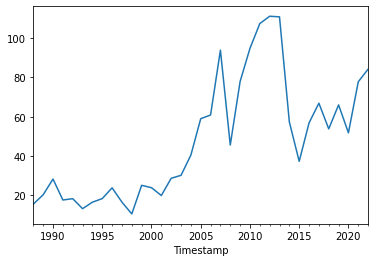

In [3]:
spot = df1["LCOc1"]
#spot = np.log(spot).diff()
spot.plot()

In [4]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot.describe()
#spot.dropna().describe()

count     35.000000
mean      48.003714
std       31.088977
min       10.530000
25%       20.090000
50%       40.460000
75%       66.435000
max      111.110000
Name: LCOc1, dtype: float64

In [5]:
print("Skewness spot:", scipy.stats.skew(spot.dropna(), axis=0, bias=True))
print("Skewness logs:", scipy.stats.skew(np.log(spot.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot.dropna(), axis=0, fisher=False, bias=True))
print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot.dropna()))
print("JB logs:", scipy.stats.jarque_bera(np.log(spot.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot.dropna(), lags=[6]))
print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot.dropna()), lags=[6]))

Skewness spot: 0.6426807343415358
Skewness logs: -0.06470258030935949
Kurtosis spot: 2.2083042006267246
Kurtosis logs: 1.7142664445992184
JB spot: Jarque_beraResult(statistic=3.323448834883907, pvalue=0.18981138366552108)
JB logs: Jarque_beraResult(statistic=2.43520735365584, pvalue=0.29593848215125695)
Q(6) spot:     lb_stat     lb_pvalue
6  79.44242  4.657693e-15
Q(6) logs:       lb_stat     lb_pvalue
6  105.853568  1.502859e-20


In [6]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot.dropna()))
print("ADF logs:", adfuller(np.log(spot.dropna())))

print("PP spot:", PhillipsPerron(spot.dropna()).summary().as_text())
print("PP logs:", PhillipsPerron(np.log(spot.dropna())).summary().as_text())



ADF spot: (-1.6931260255658052, 0.4346575901094553, 0, 34, {'1%': -3.639224104416853, '5%': -2.9512301791166293, '10%': -2.614446989619377}, 213.12672610336898)
ADF logs: (-1.5923959823031022, 0.48741213793335125, 0, 34, {'1%': -3.639224104416853, '5%': -2.9512301791166293, '10%': -2.614446989619377}, 15.229498352671797)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.523
P-value                         0.522
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.64 (1%), -2.95 (5%), -2.61 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
PP logs:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.429
P-value                         0.569
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.64 (1%), -2.95 (5%), -2.61 (10%)
Null Hypothesis: The process c

In [7]:

print("KPSS spot:", KPSS(spot.dropna()).summary().as_text())
print("KPSS logs:", KPSS(np.log(spot.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  0.689
P-value                         0.014
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
KPSS logs:     KPSS Stationarity Test Results   
Test Statistic                  0.648
P-value                         0.017
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:
ACF and PACF logs:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


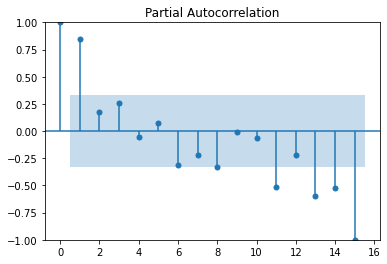

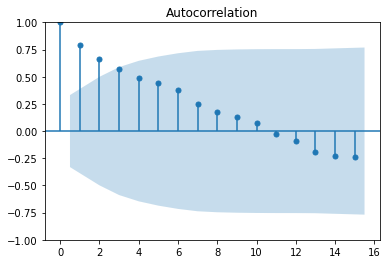

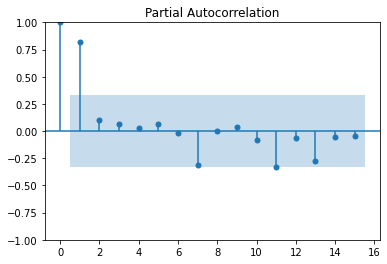

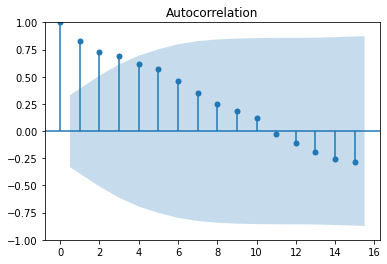

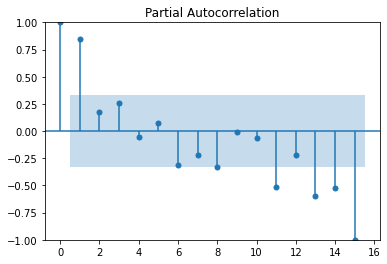

In [8]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot.dropna(), lags = 15)
plot_pacf(spot.dropna(), lags = 15)


print("ACF and PACF logs:")
plot_acf(np.log(spot.dropna()), lags = 15)
plot_pacf(np.log(spot.dropna()), lags = 15)



0.6782943507735172

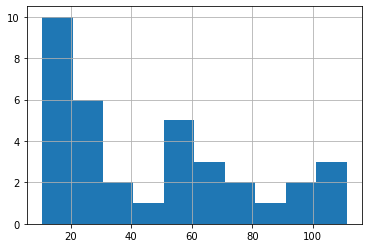

In [9]:
spot.hist()
0.6782943507735172

<AxesSubplot:>

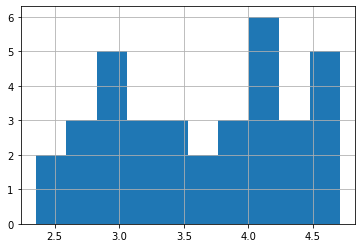

In [10]:
np.log(spot).hist()

In [12]:
# Load the data and split it into separate pieces
data = np.array(spot.dropna())
train, test = model_selection.train_test_split(data, train_size=23)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=188.751, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=188.227, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=184.387, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=184.019, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=187.324, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=186.325, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=190.014, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=189.475, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=185.466, Time=0.01 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.186 seconds


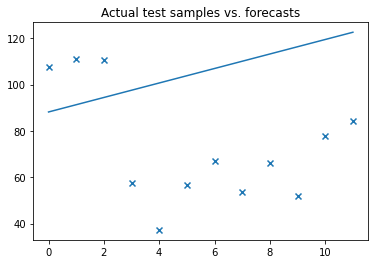

In [13]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [14]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   23
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 -89.010
Date:                Tue, 27 Dec 2022   AIC                            184.019
Time:                        16:22:46   BIC                            187.292
Sample:                             0   HQIC                           184.790
                                 - 23                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.1280      2.195      1.425      0.154      -1.174       7.430
ma.L1         -0.4930      0.178     -2.776      0.005      -0.841      -0.145
sigma2       189.4207     55.118      3.437      0.001      81.391     297.450
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                 0.98
Prob(Q):                              0.53   Prob(JB):                         0.61
Heteroskedasticity (H):               8.05   Skew:                             0.09
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

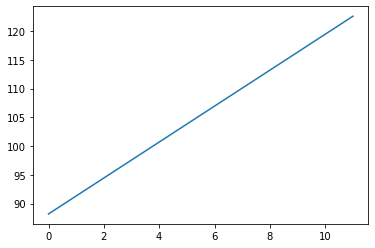

In [15]:
plt.plot(x, arima.predict(n_periods=test.shape[0]))

In [16]:
arima.predict(n_periods=test.shape[0])

array([ 88.1881805 ,  91.31622488,  94.44426927,  97.57231366,
       100.70035805, 103.82840244, 106.95644683, 110.08449122,
       113.2125356 , 116.34057999, 119.46862438, 122.59666877])

<AxesSubplot:xlabel='Timestamp'>

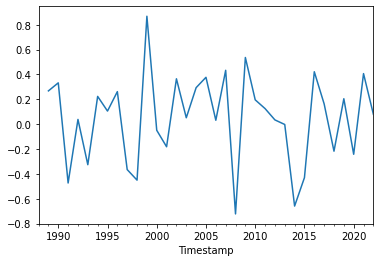

In [17]:
spot2 = np.log(spot).diff()
spot2.plot()

In [18]:
#statistics

#mean
#sd
#skewness
#kurtosis
#jb test
#Ljung Box Q(6) and Q^2(6)
#observations

spot2.describe()
#spot.dropna().describe()

count    34.000000
mean      0.049737
std       0.358574
min      -0.722009
25%      -0.208583
50%       0.092245
75%       0.286976
max       0.867842
Name: LCOc1, dtype: float64

In [19]:
print("Skewness spot:", scipy.stats.skew(spot2.dropna(), axis=0, bias=True))
#print("Skewness logs:", scipy.stats.skew(np.log(spot2.dropna()), axis=0, bias=True))
print("Kurtosis spot:", scipy.stats.kurtosis(spot2.dropna(), axis=0, fisher=False, bias=True))
#print("Kurtosis logs:", scipy.stats.kurtosis(np.log(spot2.dropna()), fisher=False, axis=0, bias=True))

print("JB spot:", scipy.stats.jarque_bera(spot2.dropna()))
#print("JB logs:", scipy.stats.jarque_bera(np.log(spot2.dropna())))
#The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.

print("Q(6) spot:", sm.stats.acorr_ljungbox(spot2.dropna(), lags=[6]))
#print("Q(6) logs:", sm.stats.acorr_ljungbox(np.log(spot2.dropna()), lags=[6]))

Skewness spot: -0.2826581519025548
Kurtosis spot: 2.7590073723168906
JB spot: Jarque_beraResult(statistic=0.5350182907560976, pvalue=0.7652833317854386)
Q(6) spot:     lb_stat  lb_pvalue
6  3.361636   0.762278


In [20]:
#stationarity

#augmented Dickie-Fuller
#PP test - Phillips and Perron
#KPSS

print("ADF spot:", adfuller(spot2.dropna()))
#print("ADF logs:", adfuller(np.log(spot2.dropna())))

print("PP spot:", PhillipsPerron(spot2.dropna()).summary().as_text())
#print("PP logs:", PhillipsPerron(np.log(spot2.dropna())).summary().as_text())

ADF spot: (-7.179228732787988, 2.6768580919928077e-10, 0, 33, {'1%': -3.6461350877925254, '5%': -2.954126991123355, '10%': -2.6159676124885216}, 17.361203662331278)
PP spot:      Phillips-Perron Test (Z-tau)    
Test Statistic                 -7.990
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.65 (1%), -2.95 (5%), -2.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [21]:
print("KPSS spot:", KPSS(spot2.dropna()).summary().as_text())
#print("KPSS logs:", KPSS(np.log(spot2.dropna())).summary().as_text())

KPSS spot:     KPSS Stationarity Test Results   
Test Statistic                  0.095
P-value                         0.610
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


ACF and PACF spot:


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


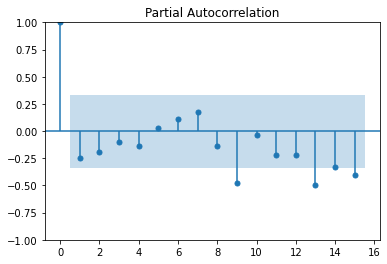

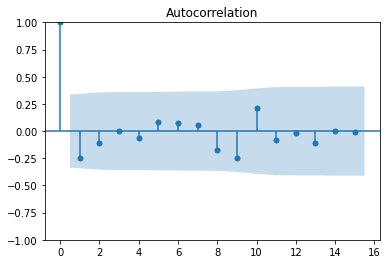

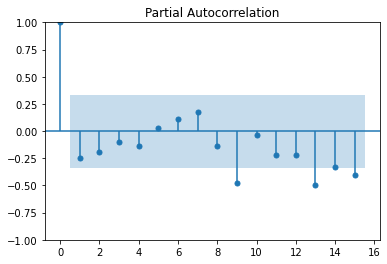

In [22]:
#ACF and PACF

print("ACF and PACF spot:")
plot_acf(spot2.dropna(), lags = 15)
plot_pacf(spot2.dropna(), lags = 15)


#print("ACF and PACF logs:")
#plot_acf(np.log(spot2.dropna()), lags = 15)
#plot_pacf(np.log(spot2.dropna()), lags = 15)


<AxesSubplot:>

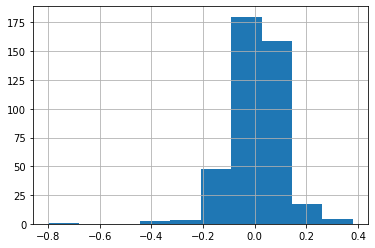

In [25]:
spot2.hist()


In [28]:
# Load the data and split it into separate pieces
data2 = np.array(spot2.dropna())
train2, test2 = model_selection.train_test_split(data2, train_size=300)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-582.535, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-575.172, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-584.746, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-586.148, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-585.541, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-584.909, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-582.724, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-585.127, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.273 seconds


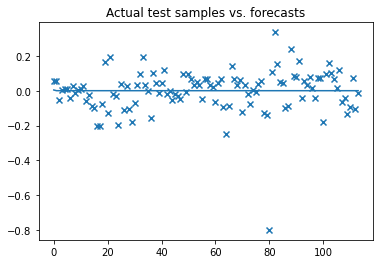

In [29]:
# Fit a simple auto_arima model
arima2 = pm.auto_arima(train2, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x2 = np.arange(test2.shape[0])
plt.scatter(x2, test2, marker='x')
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [30]:
arima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  300
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 295.074
Date:                Tue, 27 Dec 2022   AIC                           -586.148
Time:                        15:40:34   BIC                           -578.740
Sample:                             0   HQIC                          -583.183
                                - 300                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2209      0.048      4.556      0.000       0.126       0.316
sigma2         0.0082      0.000     17.387      0.000       0.007       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                65.97
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.18
Prob(H) (two-sided):                  0.64   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

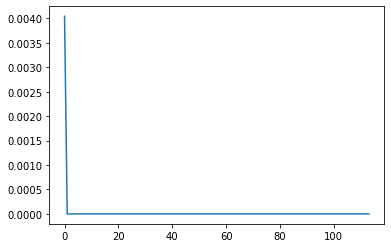

In [31]:
plt.plot(x2, arima2.predict(n_periods=test2.shape[0]))

In [32]:
arima2.predict(n_periods=test2.shape[0])

array([0.00404218, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
#cointegration tests

#normalized cv
#LR test

In [ ]:
#correlaatiomatriisi

In [ ]:
#np.argwhere(np.isnan(x))